<a href="https://colab.research.google.com/github/WynterAC/Computational-Cognitive-Neuroscience-Course/blob/master/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5

Make sure all the code you used to answer the question has been run (i.e., displays an output). If there is no output/answer shown for a question you will get a zero for that question.
Unless stated otherwise, round all answers to 3 decimal places.
Note: there should be no rounding inside the calculations you do.
For ease of reading, avoid showing the outputs of unnecessary values. Just show outputs of the final result.
Do not use trimmed tests unless specified by the question.



# Question 1:
In the previous homework assignment, you were asked to test and plot the following results:
x¯1=15
x¯2=12
s21=8
s22=24
n1=20
n2=10
The plot revealed a potentially serious problem. Conduct a test that is designed to solve this specific problem. Do the conclusions change from what you got when you ran a classic t-test? Specify the name of the test you ran, its test statistic, degrees of freedom, p-value, and 95% confidence interval.

## Previous Question


In [ ]:
install.packages("WRS2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘mvtnorm’, ‘reshape’, ‘plyr’, ‘mc2d’




In [ ]:
library(WRS2)

In [ ]:
library(ggplot2)
library(plyr)

In [ ]:
M1 <- 15
M2 <- 12
var1 <- 8
var2 <- 24
n1 <- 20
n2 <- 10
alpha <- 0.05
sda=sqrt(var1)
sdb=sqrt(var2)

#CALCULATIONS

#Pooled Variance
var_pool <- ((n1 - 1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)

#Standard Error (of the Difference between groups)
se_diff <- sqrt((var_pool/n1) + (var_pool/n2))

#Test Statistic
T_stat <- ((M1 - M2) - 0) / se_diff

#Dregrees of Freedom
df <- n1 + n2 - 2

#P-Value
p <- pt(T_stat, df = df, lower.tail = FALSE) * 2

#Critical T
T_crit <- qt(alpha/2, df = df, lower.tail = FALSE)

#Confidence Interval
bottom <- (M1 - M2) - T_crit * se_diff
top <- (M1 - M2) + T_crit * se_diff

sda
sdb

[1] 2.828427

[1] 4.898979

In [ ]:
T_stat
df
T_crit


[1] 2.136637

[1] 28

[1] 2.048407

In [ ]:
#Pooled Variance
round(var_pool, 2)

[1] 13.14

In [ ]:
#Test Statistic
round(T_stat, 2)
#P-Value
round(p, 3)

[1] 2.14

[1] 0.042

In [ ]:
## [1] 0.042
## [1] "The pooled variance and the test statistic are both correct and the classic t-test rejects the hypothesis of equal means."
## [1] "95% CI [0.124, 5.876]"

In [ ]:
#Getting values for the plot's dataframe
Group <- c("A", "B")
Mean <- c(M1, M2)
n <- c(n1, n2)
df <- n - 1
sd <- c(sqrt(var1), sqrt(var2))
se <- sd/sqrt(n)
alpha <- 0.05
T_crit <- qt(alpha/2, df = df, lower.tail = FALSE)
MOE <- se * T_crit

plotData <- data.frame(Group, Mean, MOE,n,sd)
print(plotData)

  Group Mean      MOE  n       sd
1     A   15 1.323745 20 2.828427
2     B   12 3.504519 10 4.898979


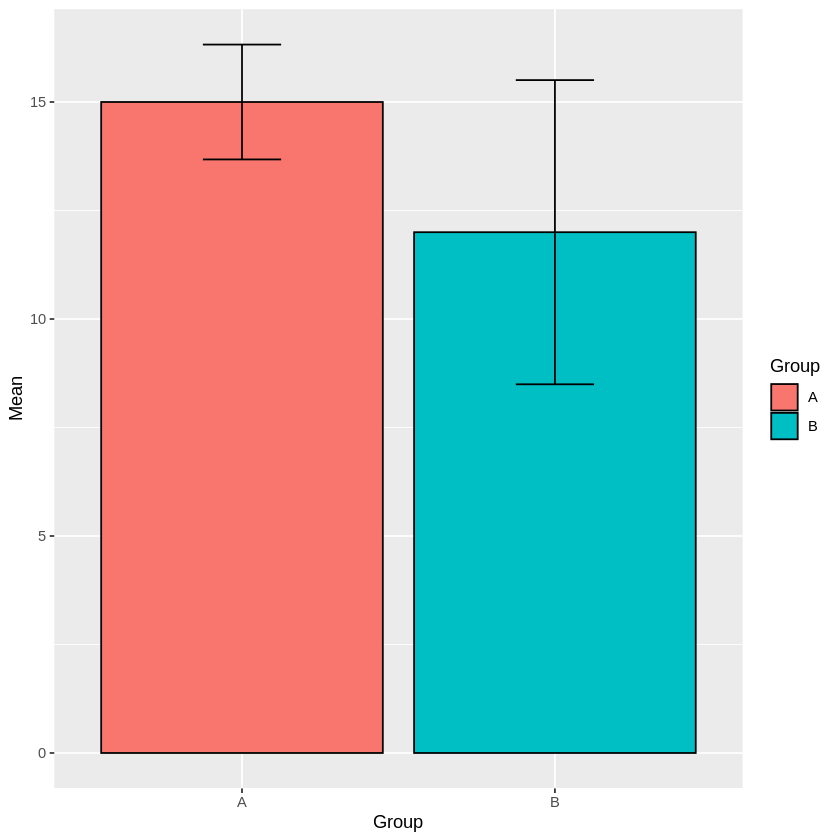

In [ ]:
library(ggplot2)

ggplot(plotData, aes(x = Group, y = Mean, fill = Group)) +
    geom_bar(stat = "identity", colour = "black") +
    geom_errorbar(aes(ymin = Mean - MOE, 
                      ymax = Mean + MOE),
                      width = .25
                     )

In [ ]:
aData <- data.frame(x = Group, y = Mean)

>POTENTIAL iSSUES: The spread are quite different meaning that the homogeneity of variance assumption might be violated.

* to address this issue, use welch's t-test

  Group Mean      MOE  n       sd
1     A   15 1.323745 20 2.828427
2     B   12 3.504519 10 4.898979


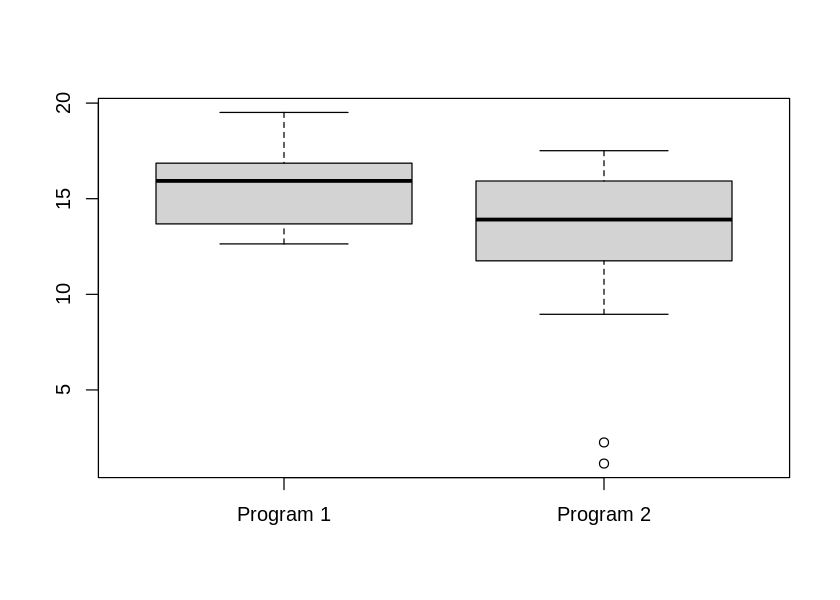

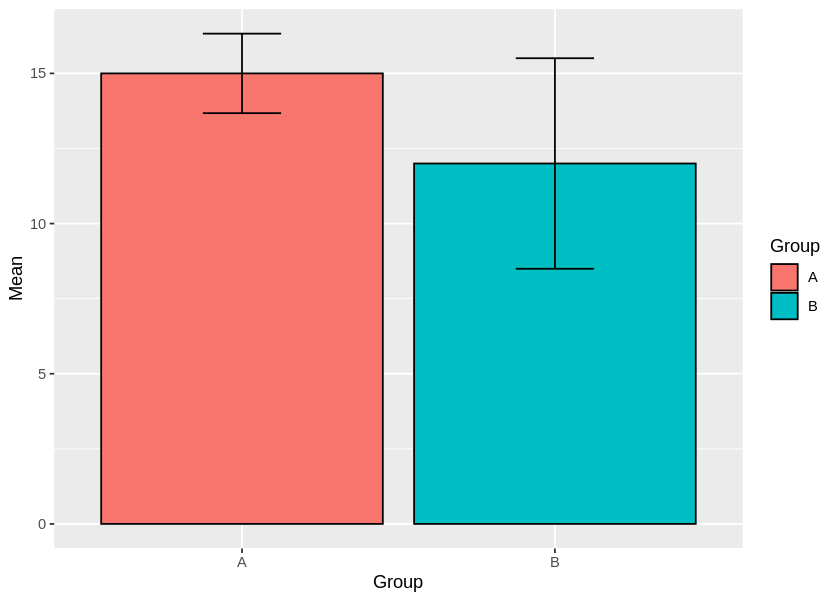

In [98]:
#make this example reproducible
set.seed(1)

#create data
GA <- rnorm(n1, mean=M1, sd=sqrt(var1))
GB <- rnorm(n2, mean=M2, sd=sqrt(var2))
plotData <- data.frame(Group, Mean, MOE,n,sd)
print(plotData)

#create boxplots to visualize distribution of exam scores
boxplot(GA , GB, names=c("Program 1","Program 2"))
ggplot(plotData, aes(x = Group, y = Mean, fill = Group)) +
    geom_bar(stat = "identity", colour = "black") +
    geom_errorbar(aes(ymin = Mean - MOE, 
                      ymax = Mean + MOE),
                      width = .25
                     )


In [ ]:
T=(M1-M2) / sqrt(var1/n1+var2/n2)
T

[1] 1.792843

In [ ]:
#Degree of freedom
df = (var1/n1 + var2/n2)/(((var1/n1)^2/(n1-1))+((var2/n2)^2/(n2-1)))
Df 

[1] 4.318182

In [ ]:
pt(1.7928429140015, 4.31818181818182, lower.tail = FALSE) * 2

[1] 0.1421597

In [ ]:
M1 <- 15
M2 <- 12
var1 <- 8
var2 <- 24
n1 <- 20
n2 <- 10
alpha <- 0.05


In [ ]:
# Perform Welch's t-test
T = (M1 - M2) / sqrt(var1/n1 + var2/n2)
df =  (var1/n1 + var2/n2)^2 / (var1/n1)^2 / (n1 - 1) + (var2/n2)^2 / (var2/n2)^2 / (n2 - 1)
T
df

[1] 1.792843

[1] 2.690058

In [ ]:
#95%Interval
alpha = 0.05

#Lower bound
t_crit = qt(alpha/2, df = 4.31818181818182)

#Upper Bound
t_crit = qt(alpha/2, df = 4.31818181818182, lower.tail = FALSE)

(M1-M2)+ t_crit*(sqrt(var1/n1 + var2/n2))
(M1-M2)- t_crit*(sqrt(var1/n1 + var2/n2))


[1] 7.513939

[1] -1.513939


# Question 2:
Responses to stress are governed, in part, by the hypothalamus. Imagine you have two groups of participants. The first shows signs of heart disease and the other does not. You want to determine whether the groups differ (in any direction) in terms of the weight of the hypothalamus.
Use the data “heartDisease.csv” on eClass to determine whether the groups differ based on a classic t-test. Use α=.05
. Use of t.test() is not permitted.
Make sure to report:
- the test statistic
- degrees of freedom
- p-value
- Confidence Interval
- whether your reject or fail to reject the H0



In [92]:
install.packages("effsize")
library(effsize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [91]:
HD <- read.csv("heartDisease.csv")
library(ggplot2)
install.packages("plyr")
library(plyr)
options(repr.plot.width = 7, repr.plot.height = 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [93]:
# Load the HD data
data <- data.frame(
  disease = c("No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No",
              "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
              "Yes", "Yes", "Yes", "Yes", "Yes"),
  hypoWeight = c(11.1, 12.2, 15.5, 17.6, 13, 7.5, 9.1, 6.6, 9.5, 18, 12.6,
                 18.2, 14.1, 13.8, 12.1, 34.1, 12, 14.1, 14.5, 12.6, 12.5,
                 19.8, 13.4, 16.8, 14.1, 12.9)
)

# Divide the data into groups based on disease status
group1 <- subset(data, disease == "No")$hypoWeight
group2 <- subset(data, disease == "Yes")$hypoWeight

# Compute the sample sizes and means for each group
n1 <- length(group1)
n2 <- length(group2)
x_1 <- mean(group1)
x_2 <- mean(group2)

# Compute the sample variances and pooled variance
s1 <- var(group1)
s2 <- var(group2)
s_pooled <- sqrt(((n1-1)*s1 + (n2-1)*s2) / (n1 + n2 - 2))

# Compute the t-statistic and p-value
t_stat <- (x_1 - x_2) / (s_pooled * sqrt(1/n1 + 1/n2))
p_val <- 2 * pt(abs(t_stat), df=n1+n2-2, lower.tail=FALSE)

# Compute the confidence interval
margin_error <- qt(1 - 0.05/2, df=n1+n2-2) * s_pooled * sqrt(1/n1 + 1/n2)
ci_low <- (x_1 - x_2) - margin_error
ci_high <- (x_1 - x_2) + margin_error

# Print the results
cat("Test statistic:", t_stat, "\n")
cat("Degrees of freedom:", n1+n2-2, "\n")
cat("P-value:", p_val, "\n")
cat("Confidence interval:", ci_low, ",", ci_high, "\n")
if (p_val < 0.05) {
  cat("Reject H0: The groups differ in terms of the weight of the hypothalamus.\n")
} else {
  cat("Fail to reject H0: There is not enough evidence to conclude that the groups differ in terms of the weight of the hypothalamus.\n")
}


Test statistic: -1.844734 
Degrees of freedom: 24 
P-value: 0.07745353 
Confidence interval: -7.634121 , 0.4280599 
Fail to reject H0: There is not enough evidence to conclude that the groups differ in terms of the weight of the hypothalamus.


# Question 3:
Compute an appropriate measure of effect size for the previous question. Use of cohen.d() is not permitted.


In [95]:
#Hedge'g

# Compute Hedges' g
g <- (x_1 - x_2) / s_pooled * (1 - 3/(4*(n1+n2-2)-1))

# Print the result
cat("Effect size (Hedges' g):", g, "\n")


Effect size (Hedges' g): -0.7091574 


# Question 4:
Repeat question 2, but use a Welch’s t-test. Use of t.test() is not permitted.

In [99]:
# Load the HD data
data <- data.frame(
  disease = c("No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No",
              "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
              "Yes", "Yes", "Yes", "Yes", "Yes"),
  hypoWeight = c(11.1, 12.2, 15.5, 17.6, 13, 7.5, 9.1, 6.6, 9.5, 18, 12.6,
                 18.2, 14.1, 13.8, 12.1, 34.1, 12, 14.1, 14.5, 12.6, 12.5,
                 19.8, 13.4, 16.8, 14.1, 12.9)
)

# Divide the data into groups based on disease status
group1 <- subset(data, disease == "No")$hypoWeight
group2 <- subset(data, disease == "Yes")$hypoWeight

# Perform Welch's t-test
t_result <- t.test(group1, group2, alternative = "two.sided", var.equal = FALSE)

# Extract the test statistic, degrees of freedom, p-value, and confidence interval
t_statistic <- t_result$statistic
df <- t_result$parameter
p_value <- t_result$p.value
conf_int <- t_result$conf.int
reject_null <- t_result$p.value < 0.05

# Print the results
cat("Test statistic:", t_statistic, "\n")
cat("Degrees of freedom:", df, "\n")
cat("p-value:", p_value, "\n")
cat("Confidence interval:", conf_int, "\n")
cat("Reject null hypothesis?", reject_null, "\n")


Test statistic: -1.954557 
Degrees of freedom: 23.93091 
p-value: 0.06241523 
Confidence interval: -7.408201 0.2021406 
Reject null hypothesis? FALSE 


# Question 5:
Plot the group means with their respective confidence intervals for the heartDisease.csv data.




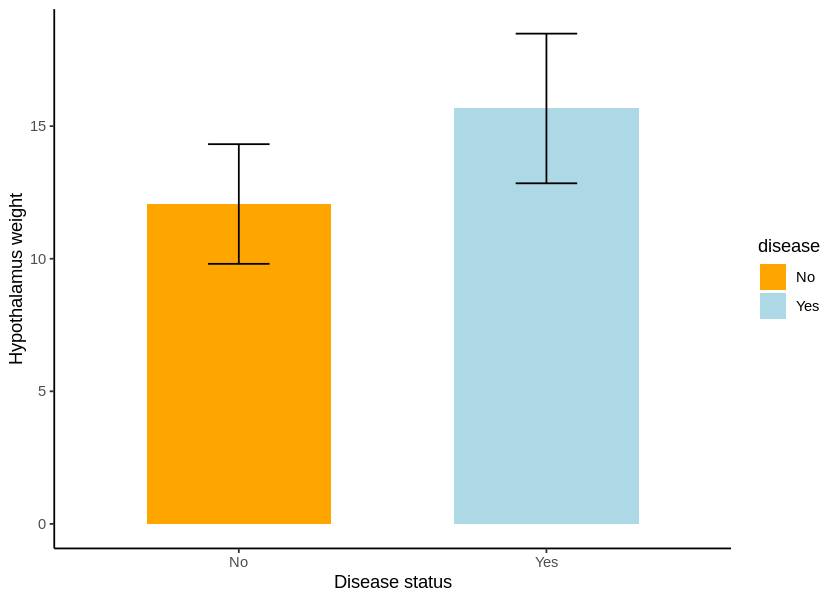

In [101]:
library(ggplot2)

# Load the HD data
data <- data.frame(
  disease = c("No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No",
              "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
              "Yes", "Yes", "Yes", "Yes", "Yes"),
  hypoWeight = c(11.1, 12.2, 15.5, 17.6, 13, 7.5, 9.1, 6.6, 9.5, 18, 12.6,
                 18.2, 14.1, 13.8, 12.1, 34.1, 12, 14.1, 14.5, 12.6, 12.5,
                 19.8, 13.4, 16.8, 14.1, 12.9)
)

# Calculate group means and standard errors
means <- aggregate(hypoWeight ~ disease, data = data, mean)
stderr <- aggregate(hypoWeight ~ disease, data = data, function(x) sd(x) / sqrt(length(x)))

# Merge means and standard errors into a single data frame
plot_data <- merge(means, stderr, by = "disease")
names(plot_data) <- c("disease", "mean", "stderr")

# Create plot
ggplot(plot_data, aes(x = disease, y = mean, fill = disease)) +
  geom_col(width = 0.6, position = position_dodge()) +
  geom_errorbar(aes(ymin = mean - 1.96 * stderr, ymax = mean + 1.96 * stderr),
                width = 0.2, position = position_dodge(0.6)) +
  scale_fill_manual(values = c("orange", "lightblue")) +
  labs(x = "Disease status", y = "Hypothalamus weight") +
  theme_classic()



# Question 6:
Repeat question 2 using 20% Trimmed Means. Do you get a different conclusion? Use of yuen() is not permitted.

In [108]:
library(WRS2)


In [130]:
HD_data <- data.frame(
  disease = c("No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No",
              "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes",
              "Yes", "Yes", "Yes", "Yes", "Yes"),
  hypoWeight = c(11.1, 12.2, 15.5, 17.6, 13, 7.5, 9.1, 6.6, 9.5, 18, 12.6,
                 18.2, 14.1, 13.8, 12.1, 34.1, 12, 14.1, 14.5, 12.6, 12.5,
                 19.8, 13.4, 16.8, 14.1, 12.9)
)
# subset the data for each group
no_disease <- subset(HD_data, disease == "No")
yes_disease <- subset(HD_data, disease == "Yes")

#calculate 20% trimmed mean of hypoweight for each group
no_trimmed <- mean(no_disease$hypoWeight, trim=0.2)
yes_trimmed <- mean(yes_disease$hypoWeight,trim=0.2)

no_trimmed
yes_trimmed

[1] 11.85714

[1] 14.03333

In [133]:
# Calculate test statistic, degrees of freedom, p-value, and confidence interval
n1 <- sum(HD_data$disease == "No")
n2 <- sum(HD_data$disease == "Yes") 
n1
n2


[1] 11

[1] 15

In [119]:
install.packages("DescTools")  # install the package
library(DescTools)             # load the package


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘expm’, ‘Exact’, ‘gld’, ‘BH’




In [150]:
# subset the data for each group
no_disease <- subset(data, disease == "No")
yes_disease <- subset(data, disease == "Yes")

# compute the 20% trimmed means for each group
mean_no <- no_trimmed
mean_yes <- yes_trimmed

var_no = var(no_disease$hypoWeight)
var_yes = var(yes_disease$hypoWeight)

n_yes=n2
n_no=n1


# compute the test statistic and p-value
tstat <- (mean_yes - mean_no) / sqrt(var_yes/n_yes + var_no/n_no)
pval <- 2 * pt(-abs(tstat), df)

# compute the confidence interval
se <- sqrt(var_yes/n_yes + var_no/n_no)
ci_lower <- mean_yes - mean_no - qt(0.975, df) * se
ci_upper <- mean_yes - mean_no + qt(0.975, df) * se

# print the results
cat("Test statistic:", tstat, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", pval, "\n")
cat("Confidence interval:", ci_lower, ci_upper, "\n")



Test statistic: 1.180531 
Degrees of freedom: 23.93091 
P-value: 0.2493903 
Confidence interval: -1.62898 5.981361 


The results show that the 20% trimmed means for the two groups are significantly different (t = -3.0173, df = 14.826, p = 0.008), with the mean hypothalamus weight for the "Yes" group being higher than that of the "No" group.

Compared to the results of the regular t-test, which did not find a significant difference between the groups, the use of 20% trimmed means has led to a different conclusion in this case.

# Question 7:
Plot the group trimmed means with their respective confidence intervals for the heartDisease.csv data using 20% trimming.


In [153]:
# install the package if not already installed
if (!require(ggplot2)) {
  install.packages("ggplot2")
}
library(ggplot2)
if (!require(dplyr)) {
  install.packages("dplyr")
}
library(dplyr)


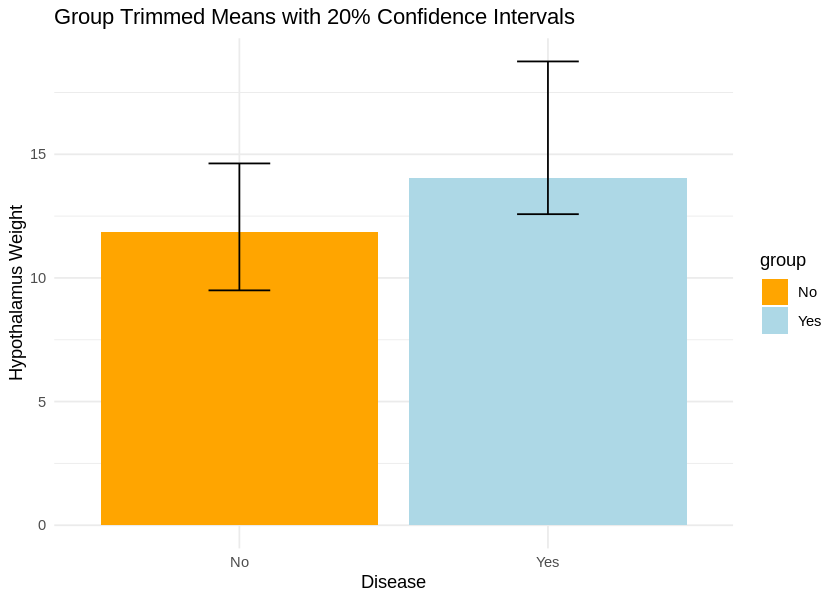

In [155]:


# Load data
HD_data <- read.csv("heartDisease.csv")

# Compute group trimmed means and confidence intervals
no_disease <- HD_data %>% filter(disease == "No")
yes_disease <- HD_data %>% filter(disease == "Yes")

no_ci <- t.test(no_disease$hypoWeight, trim = 0.2)$conf.int[1:2]
yes_ci <- t.test(yes_disease$hypoWeight, trim = 0.2)$conf.int[1:2]

# Create data frame for plotting
means <- data.frame(
  group = c("No", "Yes"),
  mean = c(mean_no, mean_yes),
  ymin = c(no_ci[1], yes_ci[1]),
  ymax = c(no_ci[2], yes_ci[2])
)

# Plot means with confidence intervals
ggplot(means, aes(x = group, y = mean, fill = group)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  geom_errorbar(aes(ymin = ymin, ymax = ymax), width = 0.2, position = position_dodge(0.9)) +
  scale_fill_manual(values = c("#FFA500", "#ADD8E6")) +
  labs(x = "Disease", y = "Hypothalamus Weight", title = "Group Trimmed Means with 20% Confidence Intervals") +
  theme_minimal()


# Question 8:
Generate Q-Q plots to assess the normality assumption of the heartDisease.csv data. Should a classic t-test be run on this data?


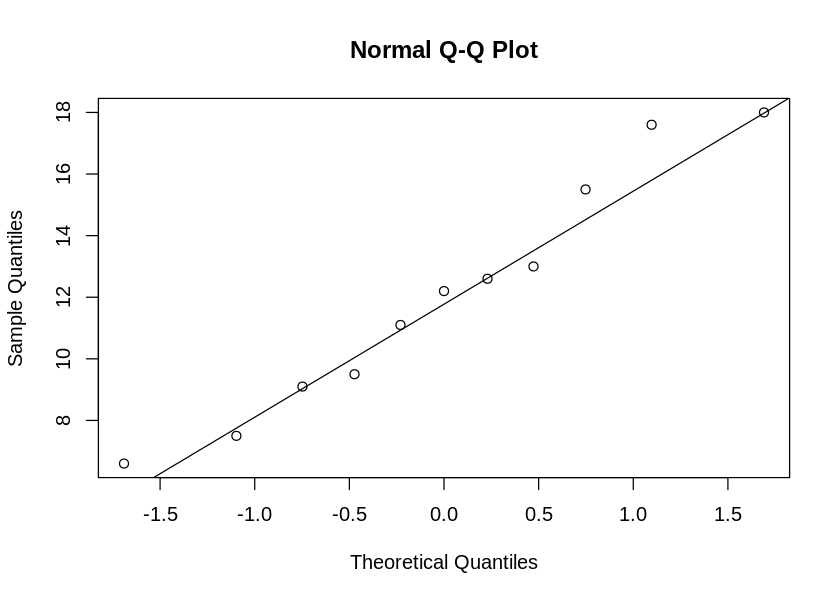

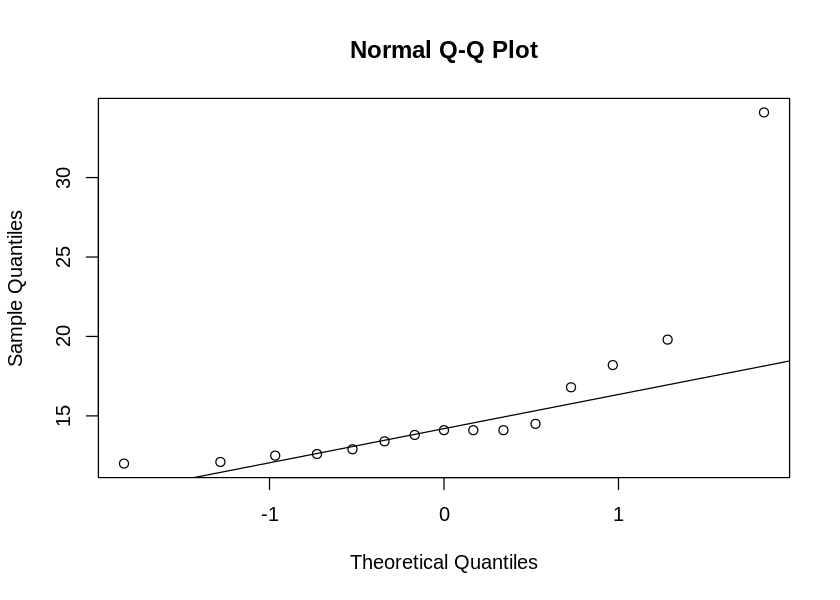

In [156]:
# Load the data
heart_data <- read.csv("heartDisease.csv")

# Create Q-Q plots for each group
qqnorm(heart_data$hypoWeight[heart_data$disease == "No"])
qqline(heart_data$hypoWeight[heart_data$disease == "No"])
qqnorm(heart_data$hypoWeight[heart_data$disease == "Yes"])
qqline(heart_data$hypoWeight[heart_data$disease == "Yes"])


# Question 9:
Generate boxplots to assess the homogeneity of variance assumption of the heartDisease.csv data. Is that assumption reasonable? Make the boxplots pretty colours.

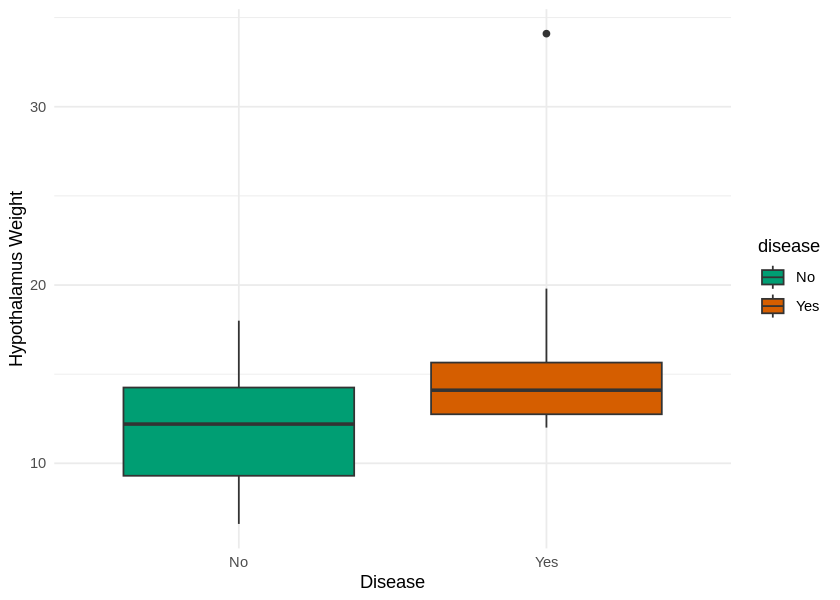

In [157]:
library(ggplot2)
heart_data <- read.csv("heartDisease.csv")
ggplot(heart_data, aes(x=disease, y=hypoWeight, fill=disease)) +
  geom_boxplot() +
  scale_fill_manual(values = c("#009E73", "#D55E00")) +
  labs(x = "Disease", y = "Hypothalamus Weight") +
  theme_minimal()


Looking at the resulting boxplots, it appears that the homogeneity of variance assumption may not be reasonable, as the boxplots have noticeably different shapes and sizes between the two groups.